<a href="https://colab.research.google.com/github/VladislavasR/PP6/blob/main/PP6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load data

In [40]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [41]:
print(len(train_data))
print(list(train_data[0]))
print(len(list(train_data[0])))
print(len(list(train_data[1])))

25000
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
218
189


In [42]:
train_labels[0]

1

In [43]:
max([max(sequence) for sequence in train_data])

9999

In [44]:
# word_index is a dictionary mapping words to an integer index
word_index = imdb.get_word_index()
# We reverse it, mapping integer indices to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# We decode the review; note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [45]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

Prepare data

In [46]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

In [47]:
print(list(x_train[0]))
print(list(x_train[1]))
print(len(list(x_train[1])))

[0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0,

In [48]:
# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

print(y_test[0])
print(y_test[1])
print(y_test[2])

0.0
1.0
1.0


Build network

In [49]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [50]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [51]:
from tensorflow.keras import optimizers

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [52]:
from keras import losses
from keras import metrics
from tensorflow.keras import optimizers

model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001), loss=losses.binary_crossentropy, metrics=[metrics.binary_accuracy])

Validate our aproach

In [53]:
x_train.shape

(25000, 10000)

In [54]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [55]:
print(x_val.shape)
print(partial_x_train.shape)

(10000, 10000)
(15000, 10000)


In [56]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 52ms/step - loss: 0.5130 - binary_accuracy: 0.7831 - val_loss: 0.3838 - val_binary_accuracy: 0.8696
Epoch 2/20
30/30 [==============================] - 1s 36ms/step - loss: 0.3034 - binary_accuracy: 0.9045 - val_loss: 0.2997 - val_binary_accuracy: 0.8875
Epoch 3/20
30/30 [==============================] - 1s 36ms/step - loss: 0.2198 - binary_accuracy: 0.9282 - val_loss: 0.2810 - val_binary_accuracy: 0.8869
Epoch 4/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1723 - binary_accuracy: 0.9441 - val_loss: 0.2796 - val_binary_accuracy: 0.8869
Epoch 5/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1393 - binary_accuracy: 0.9569 - val_loss: 0.2989 - val_binary_accuracy: 0.8813
Epoch 6/20
30/30 [==============================] - 1s 37ms/step - loss: 0.1182 - binary_accuracy: 0.9627 - val_loss: 0.2926 - val_binary_accuracy: 0.8862
Epoch 7/20
30/30 [==============================] - 1s 36ms/step - los

In [57]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

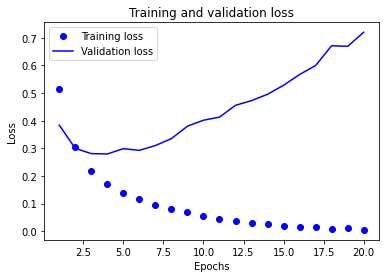

In [58]:
import matplotlib.pyplot as plt

acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

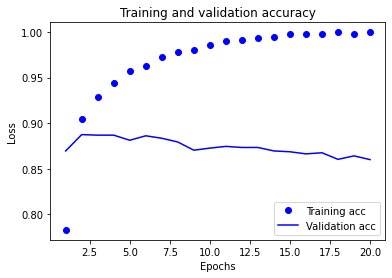

In [59]:
plt.clf()   # clear figure
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [65]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['binary_accuracy'])

history = model.fit(x_train, y_train, epochs=15, batch_size=256, validation_data=(x_val, y_val))
results = model.evaluate(x_test, y_test)

Epoch 1/15
98/98 [==============================] - 3s 23ms/step - loss: 0.4083 - binary_accuracy: 0.8417 - val_loss: 0.2303 - val_binary_accuracy: 0.9250
Epoch 2/15
98/98 [==============================] - 2s 20ms/step - loss: 0.2259 - binary_accuracy: 0.9158 - val_loss: 0.1623 - val_binary_accuracy: 0.9475
Epoch 3/15
98/98 [==============================] - 2s 20ms/step - loss: 0.1785 - binary_accuracy: 0.9348 - val_loss: 0.1595 - val_binary_accuracy: 0.9410
Epoch 4/15
98/98 [==============================] - 2s 19ms/step - loss: 0.1505 - binary_accuracy: 0.9460 - val_loss: 0.1135 - val_binary_accuracy: 0.9651
Epoch 5/15
98/98 [==============================] - 2s 19ms/step - loss: 0.1312 - binary_accuracy: 0.9526 - val_loss: 0.1294 - val_binary_accuracy: 0.9518
Epoch 6/15
98/98 [==============================] - 2s 19ms/step - loss: 0.1162 - binary_accuracy: 0.9590 - val_loss: 0.0828 - val_binary_accuracy: 0.9758
Epoch 7/15
98/98 [==============================] - 2s 19ms/step - los

In [66]:
results

# 16, 16, e:6, bs:512   --> [0.32976052165031433, 0.8768399953842163]
# 16, 16, e:12, bs:256  --> [0.6646888852119446, 0.8500400185585022]
# 16, 16, e:15, bs:256  --> [0.8773587346076965, 0.849120020866394]

[0.8363867998123169, 0.8464400172233582]

In [67]:
print(epochs, len(acc))

range(1, 21) 20


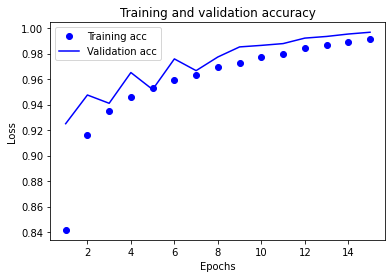

In [68]:
import matplotlib.pyplot as plt

history_dict = history.history

plt.clf()
acc = history_dict['binary_accuracy']
val_acc = history_dict['val_binary_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

All in one place

In [2]:
import numpy as np
from keras.datasets import imdb
from keras import models
from keras import layers
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt

# load data
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

# preproc
def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

In [70]:
lst = [1, 2, 3]
tr, ts = lst[:2], lst[2:]
print(tr, ts)

[1, 2] [3]


Epoch 1/45
79/79 [==============================] - 3s 25ms/step - loss: 0.6901 - binary_accuracy: 0.5387 - val_loss: 0.6846 - val_binary_accuracy: 0.5876
Epoch 2/45
79/79 [==============================] - 2s 22ms/step - loss: 0.6759 - binary_accuracy: 0.6324 - val_loss: 0.6652 - val_binary_accuracy: 0.6666
Epoch 3/45
79/79 [==============================] - 2s 24ms/step - loss: 0.6508 - binary_accuracy: 0.7126 - val_loss: 0.6370 - val_binary_accuracy: 0.7322
Epoch 4/45
79/79 [==============================] - 2s 21ms/step - loss: 0.6188 - binary_accuracy: 0.7681 - val_loss: 0.6051 - val_binary_accuracy: 0.7694
Epoch 5/45
79/79 [==============================] - 2s 24ms/step - loss: 0.5846 - binary_accuracy: 0.8070 - val_loss: 0.5739 - val_binary_accuracy: 0.8096
Epoch 6/45
79/79 [==============================] - 2s 22ms/step - loss: 0.5512 - binary_accuracy: 0.8339 - val_loss: 0.5434 - val_binary_accuracy: 0.8234
Epoch 7/45
79/79 [==============================] - 2s 22ms/step - los

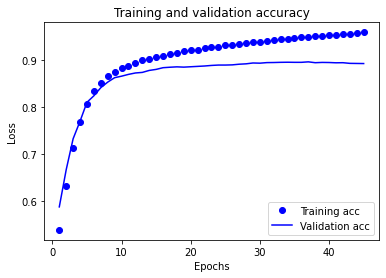

In [4]:
# Our vectorized data
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = train_labels
y_test = test_labels

# Split train data into train and validation
split_at_idx = 20000
x_train, x_val = x_train[:split_at_idx], x_train[split_at_idx:]
y_train, y_val = y_train[:split_at_idx], y_train[split_at_idx:]
assert len(x_train) == split_at_idx and len(x_val) == len(train_data) - split_at_idx 
assert len(y_train) == split_at_idx and len(y_val) == len(train_labels) - split_at_idx 

# modeling
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.000025), loss='binary_crossentropy', metrics=['binary_accuracy'])

history = model.fit(x_train, y_train, epochs=45, batch_size=256, validation_data=(x_val, y_val))

# evaluation
results = model.evaluate(x_test, y_test)
print(results)

history_dict = history.history

plt.clf()
acc = history_dict['binary_accuracy']
val_acc = history_dict['val_binary_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()